In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# let's have a look at the data scraped from web of science

there's considerable range in our bs values; this may be informative aboutthe different entitites:
_fields, countries, genders, institutions, journals .._

In [2]:
neuro_df = pd.read_csv('/Users/mococomac/PycharmProjects/bsFactor/fields/neuroscience/outputs/neuroscience_bs_indices.csv')
physi_df = pd.read_csv('/Users/mococomac/PycharmProjects/bsFactor/fields/physics/outputs/physics_bs_indices.csv')

In [3]:
print("there's " + str(neuro_df.shape[0]) + ' neuroscience indices, with values from ' +str(np.round(neuro_df['BS_Index'].min(),4)) + ' to ' + str(neuro_df['BS_Index'].max()) + ', from ' + str(len(neuro_df["Country"].unique())) + ' countries and ' + str(len(neuro_df["Author"].unique())) + ' authors with '+ str(np.round(neuro_df.groupby('Author')['BS_Index'].count().mean()))+' papers on average')
print('\n')
print("there's " + str(physi_df.shape[0]) + ' physics indices, with values from ' +str(np.round(physi_df['BS_Index'].min(),4)) + ' to ' + str(physi_df['BS_Index'].max())+ ', from ' + str(len(physi_df["Country"].unique())) + ' countries and ' + str(len(physi_df["Author"].unique())) + ' authors with '+str(np.round(physi_df.groupby('Author')['BS_Index'].count().mean()))+' papers on average')

there's 178259 neuroscience indices, with values from 0.0 to 40.775368348915755, from 41 countries and 4605 authors with 39.0 papers on average


there's 55159 physics indices, with values from 0.0 to 101.31687242798355, from 13 countries and 1509 authors with 37.0 papers on average


in case we want to see which neuro authors are best and worst (with a minimum of 10 published papers in the database)

In [4]:
filter_function = lambda x: x['Author'].value_counts().get(x.name, 0) >= 10

In [5]:
neuro_df.groupby('Author').filter(filter_function).groupby('Author')['BS_Index'].mean().sort_values(ascending=True)

Author
Barinaga, M          0.130571
Hardcastle, VG       0.169228
Garcia-marques, L    0.210708
Wigstrom, H          0.248226
Ramos, JMJ           0.250568
                       ...   
Zhang, MIN-LING      4.060492
Hassabis, D          4.079575
Smith, STEPHEN       4.256664
Schore, AN           4.676463
Cambria, E           4.713953
Name: BS_Index, Length: 3344, dtype: float64

same thing for physics

In [6]:
physi_df.groupby('Author').filter(filter_function).groupby('Author')['BS_Index'].mean().sort_values(ascending=True)

Author
Jung, YD            0.391516
Kimura, NORIYUKI    0.391706
Smith, RW           0.403165
Gagnon, P           0.406720
Tolias, P           0.422265
                      ...   
Smith, J            3.715156
Aguilar, JA         3.797684
Zhou, N             3.944929
Smith, VJ           4.113306
Zhang, Z            5.262919
Name: BS_Index, Length: 609, dtype: float64

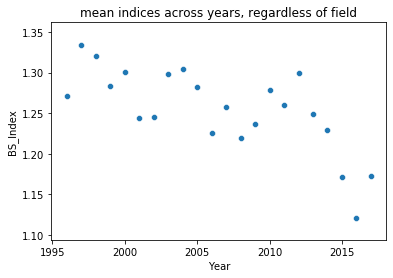

In [7]:
# scatterplot to eyeball how the indices have evolved across years

sns.scatterplot(pd.concat([neuro_df,physi_df]).groupby(['Year'])['BS_Index'].mean()).set(title='mean indices across years, regardless of field');


# let's plot some histograms #

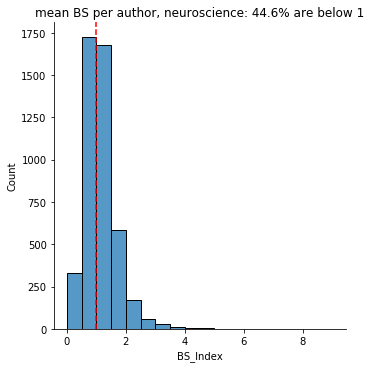

In [8]:
p = sns.displot(neuro_df.groupby('Author').mean(), x="BS_Index",binwidth=0.5);

inlf_neuro_authors = np.round((neuro_df.groupby('Author').mean()['BS_Index']<1).sum()/len(neuro_df["Author"].unique()),3)
inlf_neuro_authors *= 100

p.set(title='mean BS per author, neuroscience: ' + str(inlf_neuro_authors) + '% are below 1')
plt.axvline(x=1, color='red', linestyle='--', label='Vertical Line');

the ones below 0.5 are suspicious - if they have a high N of publications

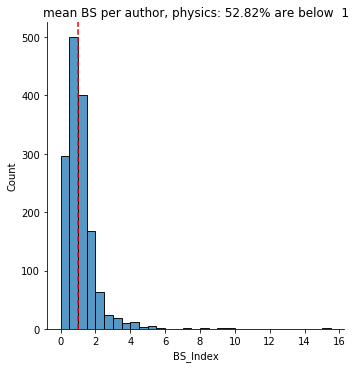

In [10]:
p = sns.displot(physi_df.groupby('Author').mean(), x="BS_Index",binwidth=0.5);

infl_physi_authors = (physi_df.groupby('Author').mean()['BS_Index']<1).sum()/len(physi_df["Author"].unique())
infl_physi_authors *= 100

p.set(title='mean BS per author, physics: ' + str(np.round(infl_physi_authors,2)) + '% are below  1');
plt.axvline(x=1, color='red', linestyle='--', label='Vertical Line');

**let's see how bs indices progress with years in the game**

In [21]:
df = pd.concat([neuro_df.groupby('Author').filter(filter_function),physi_df.groupby('Author').filter(filter_function)])
df = df.groupby(['Author','Year'])['BS_Index'].mean().reset_index()

print(len(df.Author.unique()),'authors with at least 10 publications')

3947 authors with at least 10 publications


here below we can see what the average bs is for each year in the game

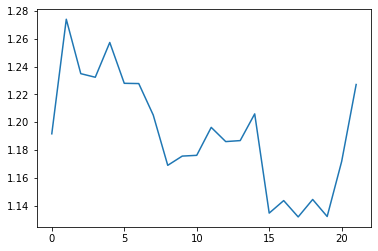

In [12]:
df['normalized_time'] = df.groupby('Author')['Year'].cumcount()
plt.plot(df['normalized_time'].unique(),df.groupby('normalized_time')['BS_Index'].mean());

pretty stable on the overall (0.14 diff at most)